# Antes de empezar :
   - Estos ejercicios están relacionados con las lecciones Subconjunto y Estadísticas descriptivas.
   - Tenga en cuenta que necesitará utilizar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta `your-code` de este laboratorio.
   - Elabora tus códigos y resultados tanto como puedas.
   - Esfuérzate al máximo para responder a las preguntas y completar las tareas y, sobre todo, ¡¡¡disfruta del proceso!!!

#### Importa todas las librerías necesarias

In [12]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt

# Desafío 1

#### En este reto utilizaremos el archivo `Temp_States.csv`. 

#### Primero impórtalo en un marco de datos llamado `temp`.

In [2]:
file_path = './Temp_States.csv'
temp = pd.read_csv(file_path)

#### Print `temp`

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore los tipos de datos del marco de datos Temp. ¿Qué tipo de datos tenemos? Comenta tu resultado.

In [4]:
print(temp.dtypes)

City            object
State           object
Temperature    float64
dtype: object


#### Selecciona las filas en las que el estado es New York

In [5]:
ny_rows = temp[temp['State'] == 'New York']
print(ny_rows)

      City     State  Temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333


#### ¿Cuál es la temperatura media de las ciudades de Nueva York?

In [6]:
ny_mean_temp = ny_rows['Temperature'].mean()
print(f'Temperatura media de las ciudades de Nueva York: {ny_mean_temp:.2f} grados centígrados')

Temperatura media de las ciudades de Nueva York: 10.74 grados centígrados


#### Queremos conocer las ciudades y estados con temperaturas superiores a 15 grados centígrados.

In [7]:
above_15 = temp[temp['Temperature'] > 15]
print(above_15)

       City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222
5    Treton   New Jersey    22.222222
6    Newark   New Jersey    20.000000


#### Ahora, devuelva sólo las ciudades que tengan una temperatura superior a 15 grados centígrados.

In [8]:
cities_above_15 = above_15['City']
print(cities_above_15)

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object


#### Queremos saber qué ciudades tienen una temperatura superior a 15 grados Celcius e inferior a 20 grados Celcius

*Pista: Primero escriba la condición y luego seleccione las filas.

In [9]:
state_stats = temp.groupby('State')['Temperature'].agg(['mean', 'std'])
print(state_stats)

                  mean       std
State                           
Connecticut  15.833333  1.964186
New Jersey   21.111111  1.571348
New York     10.740741  8.133404


In [10]:
temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Halla la media y la desviación estándar de la temperatura de cada estado.

*Pista: Utiliza las funciones de la lección Manipulación de datos*.

In [11]:
state_stats = temp.groupby('State')['Temperature'].agg(['mean', 'std'])
print(state_stats)

                  mean       std
State                           
Connecticut  15.833333  1.964186
New Jersey   21.111111  1.571348
New York     10.740741  8.133404


# Desafío 2

#### Cargar el fichero `employee.csv` en un DataFrame. Llama al dataframe `employee`.

In [13]:
file_path = './Employee.csv'
employee = pd.read_csv(file_path)

#### Explore los tipos de datos del marco de datos Temp. Comenta tus resultados

In [14]:
print(employee.dtypes)

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object


#### Muestre visualmente la distribución de frecuencias (histograma) del conjunto de datos de empleados. Describa en pocas palabras estos histogramas.

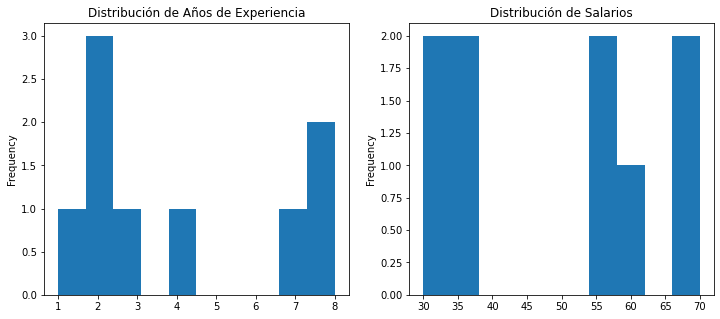

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
employee['Years'].plot(kind='hist', ax=axs[0], title='Distribución de Años de Experiencia', bins=10)
employee['Salary'].plot(kind='hist', ax=axs[1], title='Distribución de Salarios', bins=10)
plt.show()

#### ¿Cuál es el salario medio en esta empresa?

In [16]:
average_salary = employee['Salary'].mean()
print(f"El salario medio en esta empresa es: {average_salary}")

El salario medio en esta empresa es: 48.888888888888886


#### ¿Cuál es el salario más alto?

In [17]:
highest_salary = employee['Salary'].max()
print(f"El salario más alto es: {highest_salary}")

El salario más alto es: 70


#### ¿Cuál es el salario más bajo?

In [18]:
lowest_salary = employee['Salary'].min()
print(f"El salario más bajo es: {lowest_salary}")

El salario más bajo es: 30


#### ¿Quiénes son los empleados con el salario más bajo?

In [30]:
employees_with_lowest_salary = employee[employee['Salary'] == lowest_salary]
print(employees_with_lowest_salary)

    Name Department Education Gender    Title  Years  Salary
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### ¿Podría darnos toda la información sobre un empleado llamado David?

In [31]:
employee_david = employee[employee['Name'] == 'David']
print(employee_david)

    Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30


#### ¿Podría dar sólo el sueldo de David?

In [32]:
salary_david = employee_david['Salary'].values
print(f"El sueldo de David es: {salary_david}")

El sueldo de David es: [30]


#### Printea todas las líneas en las que el cargo es asociado

In [33]:
associates = employee[employee['Title'] == 'associate']
print(associates)

     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60


#### Printea las 3 primeras filas de tu dataframe

##### Consejo : Hay 2 maneras de hacerlo. Hazlo de las dos maneras

In [34]:
print(employee.head(3))

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


In [35]:
print(employee.iloc[:3])

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### ¿Encuentra a los empleados cuyo cargo es asociado y cuyo salario es superior a 55?

In [36]:
associates_with_high_salary = employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]
print(associates_with_high_salary)

    Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60


#### Agrupa a los empleados en función del número de años que llevan trabajando. ¿Cuáles son los salarios medios de cada grupo?

In [37]:
average_salary_by_years = employee.groupby('Years')['Salary'].mean()
print(average_salary_by_years)

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64


#### ¿Cuál es el salario medio por título?

In [38]:
average_salary_by_title = employee.groupby('Title')['Salary'].mean()
print(average_salary_by_title)

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64


#### Muestra un resumen visual de los datos utilizando boxplot. ¿Cuáles son los cuartiles primero y tercero? Comenta tus resultados.

* Pista : Cuantiles vs Cuartiles*.
En Probabilidad y Estadística, los cuantiles son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales. Cuando la división es en cuatro partes, los valores de la variable correspondientes al 25%, 50% y 75% de la distribución total se denominan cuartiles.

<Figure size 720x432 with 0 Axes>

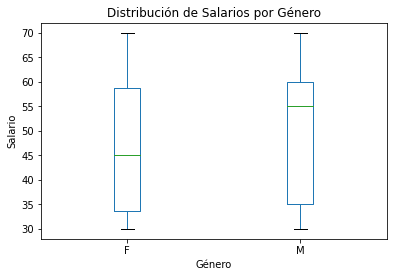

Primer cuartil (Q1): 35.0
Tercer cuartil (Q3): 60.0


In [40]:
plt.figure(figsize=(10, 6))
employee.boxplot(column='Salary', by='Gender', grid=False)
plt.title('Distribución de Salarios por Género')
plt.suptitle('')
plt.xlabel('Género')
plt.ylabel('Salario')
plt.show()

# Calcular los cuartiles primero (Q1) y tercero (Q3) para los salarios
Q1 = employee['Salary'].quantile(0.25)
Q3 = employee['Salary'].quantile(0.75)

print(f"Primer cuartil (Q1): {Q1}")
print(f"Tercer cuartil (Q3): {Q3}")

#### ¿Es diferente el salario medio por género?

In [39]:
average_salary_by_gender = employee.groupby('Gender')['Salary'].mean()

print("Salario medio por género:")
print(average_salary_by_gender)

Salario medio por género:
Gender
F    47.5
M    50.0
Name: Salary, dtype: float64


#### Encuentra el mínimo, la media y el máximo de todas las columnas numéricas para cada Departamento.

##### Sugerencia: Utiliza las funciones de la lección Manipulación de Datos

### Pregunta bonus

#### Para cada departamento, calcule la diferencia entre el salario máximo y el salario mínimo.

##### * Sugerencia: pruebe a utilizar `agg` o `apply` y `lambda`*.

In [ ]:
# your answer here


# Desafío 3

#### Abra el conjunto de datos Orders.csv. Nombre el conjunto de datos pedidos

In [ ]:
# your answer here

#### Explore su conjunto de datos observando los tipos de datos y las estadísticas de resumen. Comenta tus resultados

In [ ]:
# your answer here

In [ ]:
# your answer here

#### ¿Cuál es el precio medio de compra?

In [ ]:
# your answer here

#### ¿Cuáles fueron los precios de compra más altos y más bajos? 

In [ ]:
# your answer here

In [ ]:
# your answer here

#### Seleccione todos los clientes que tenemos en España

In [ ]:
# your answer here

#### ¿Cuántos clientes tenemos en España?
##### Pista : Utiliza value_counts()

In [ ]:
# your answer here

#### Selecciona todos los clientes que han comprado más de 50 artículos ?

In [ ]:
# your answer here

#### Selecciona pedidos de España superiores a 50 artículos

In [ ]:
# your answer here

#### Seleccionar todos los pedidos gratuitos

In [ ]:
# your answer here

#### Seleccionar todos los pedidos que sean 'lunch bag
#### Pista: Utilice las funciones de cadena

In [ ]:
# your answer here

#### Seleccione todos los pedidos realizados en 2011 y que sean «lunch bag».  

In [ ]:
# your answer here

#### Muestra la distribución de frecuencias del importe gastado en España.

In [ ]:
# your answer here

#### Seleccione todos los pedidos realizados en el mes de agosto

In [ ]:
# your answer here

#### Seleccione cuántos pedidos se realizan por países en el mes de agosto
##### Pista: Utilice value_counts()

In [ ]:
# your answer here

#### ¿Cuál es el gasto medio por país?

In [ ]:
# your answer here

#### ¿Cuál es el artículo más caro?

In [ ]:
# your answer here

#### ¿Cuál fue la cantidad media gastada al año?

In [ ]:
# your answer here